# Assignment: Data Wrangling
## `! git clone https://github.com/DS3001/wrangling`
## Do Q2, and one of Q1 or Q3.

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/content/airbnb_hw.csv')



999


In [13]:
var = 'Price'

In [14]:
print(df[var])

0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: object


Before cleaning: 
 999 



<Axes: >

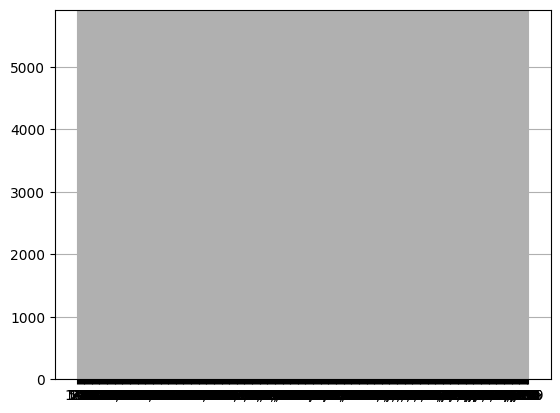

In [20]:
print('Before cleaning: \n', df[var].describe(),'\n') # The age variable is not read by Pandas as a number
df[var].hist(bins=50) # Initial histogram; check out the x axis

<ipython-input-25-ba0e1d3b5382>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
<ipython-input-25-ba0e1d3b5382>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_nan'] = df['Price'].isnull()


Total Missings: 
 181 



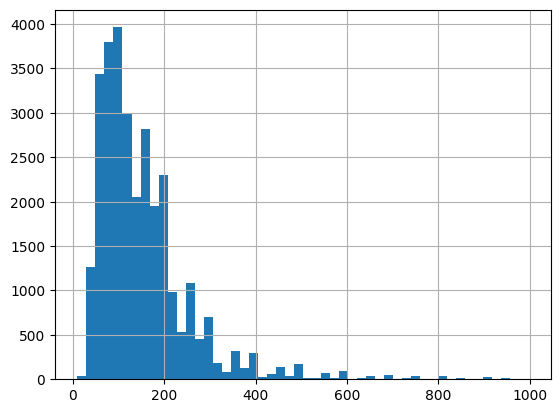

In [25]:
#Convert any non-numeric data to get rid of symbols or text. I did this in case the data was in text format and couldnt be read.
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#I did this in order to remove null values which may have skewed the results. A new column is created to count the missings.
df['Price_nan'] = df['Price'].isnull()

df['Price'].hist(bins = 50)

#Count missing values
print('Total Missings: \n', sum(df['Price_nan']),'\n')

181 Total missing value

**Question 2**



In [64]:


df = pd.read_csv('/content/sharks (2).csv')
df['Type']
pd.unique(df['Type'])



<ipython-input-64-8c820ca0cb1f>:1: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sharks (2).csv')


array(['Unprovoked', 'Provoked', 'Questionable', 'Watercraft',
       'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation',
       'Boating', 'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [69]:

# Change unprovoked to 1 and provoked to 0. This way we can stop everything else with the next step. The other categories are under investgation, boating, etc.. and
# nan's. By replacing the two categories we care about with numbers its easier to drop all the others we dont care about
# along woth nan's

df['Type'] = df['Type'].replace({'Unprovoked': 1, 'Provoked': 0})


#ANy type that numeric, so unprovoked or provoked, gets dropped
df['Type'] = pd.to_numeric(df['Type'], errors='coerce')

#The nan values might be numeric so this line gets rid of those
df = df.dropna(subset=['Type'])

pd.unique(df['Type'])



array([1., 0.])

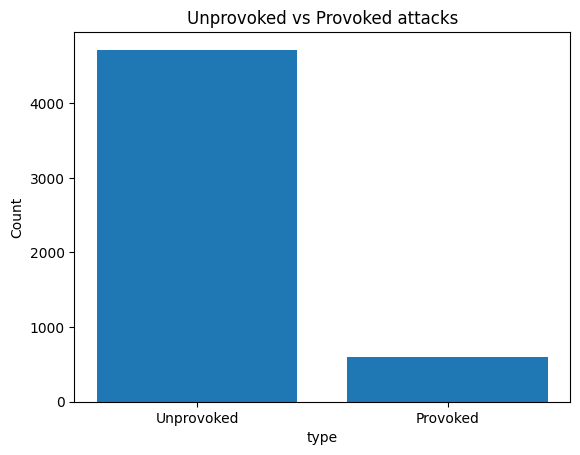

In [70]:

attacks = df['Type'].value_counts()
plt.bar(['Unprovoked', 'Provoked'], attacks)


plt.xlabel('type')
plt.ylabel('Count')
plt.title('Unprovoked vs Provoked attacks')

plt.show()

**Question 3**


In [77]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

KeyboardInterrupt: 

This code just runs forever and doesnt end up loading things in. My computers fan has turned on I am mildly concerned.

If i had the data i'd do something like this:

In [ ]:
var= 'WhetherDefendantWasReleasedPretrial'

# The ' ' would be replaced by a nan letting us know it is not a value to use.
df[var] = df[var].replace(' ',np.nan)

**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1. Accoding to census.gov, racial data was collected with, "a mix of detailed checkboxes and write-in areas".
2. By having racial data we can better interpret trends in culture, inequality, and population across the country. In politics racial data informs policies to address racial divides. For example, by knowing the population of a certain race is growing in the US, policy can be created to better address their suspected
 needs/integration into American culture. Data quality is the foundation of the census and any claims that are made based of analysis of census data.
3. I think the census could improve rates of survey completion by implementing it into workplaces, schools, courts, hospitals. In any of these places when establishing someones identity, perhaos the census could be queried and if it shows no response from that person then they are prompted to complete the census. This way the census invitation will not be as easily dismissed. This may also help capture people that are outside of the traditional 'households' that the census survey is sent to so a more accurate racial picture could be developed. I was impressed that a census representative was sent out in the field for verification in some cases. I also believe that asking for added detail after a participant checks white or black is a good thing particularly for mixed race individuals.
4. Missing values in protected characteristics are concerning because if one group of people represented by those values is more likely not to report them then any results from the data analysis do not represent reality. Filling in missing data would be a challenge. There is not enough time or money to send an in-person representative and it would be difficult to make any kind of predictions. Predicting protected values may require using personal information or might tempt some to assume and infer incorrect data. A good practice would be to send out another survey if possible of missing fields. If possible this would be better than trying to input new data based on general assumptions.
5. I would be concerned with which variables this person has chosen touse to predict the protected charactertistics. Given the diversity of people even an accurate model would misidentify many. Furthermore, people may self identify outside of anything the model may predict. Additionally, I would be concerned that the creator of the algorithim could alter its predictions to reflect their own interests in the data.